# Title: Optimizing Movie Recommendations Using Multi-Armed Bandits
## Assignment -  Part #1- MAB

## Group No. 13  ( Deep Reinforcement Learning )

## Team Contributions

####                                            List only the BITS (Name) of active contributors in this assignment:


| Name                  | BITS ID       | Contribution |
|-----------------------|---------------|--------------|
| Ramlal Singh          | 2023AC05814   |     (100%)   |
| Harish Kumar          | 2023AD05136   |     (100%)   |
| Cherukupally Sarika   | 2023AC05780   |     (100%)   |
| Penta Srujana         | 2023AC05788   |     (100%)   |



In [3]:
# Requirements and Deliverables:
# 1. Load the movie ratings dataset and preprocess it as needed.
# 2. Define the environment and compute rewards.
# 3. Implement a random policy for movie recommendations and print each iteration.
# 4. Implement a greedy policy that always recommends the movie with the highest estimated reward and print each iteration.
# 5. Implement the epsilon-greedy policy, where with probability ε you explore (recommend a random movie) and with probability (1-ε) you exploit (recommend the best-known movie). Try with ε = 0.1, 0.2, 0.5, and print each iteration. What value of ε yields the best performance?
# 6. Implement the UCB algorithm for movie recommendations and print each iteration.
# 7. Plot the cumulative rewards for all policies on a single graph to compare their performance.
# 8. Determine which policy performs the best based on cumulative reward. Provide a concise conclusion summarizing the decision-making process and the trade-offs between exploration and exploitation.


1. Load the movie ratings dataset and preprocess it as needed.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the movie ratings dataset and preprocess it as needed.

# Step 1: Load and preprocess the dataset
file_path = 'C:/Users/Harish Kumar/Downloads/TrendMovie.csv'
df = pd.read_csv(file_path)


# Convert ratings into rewards
# Reward = 1 if Rating >= 4, else Reward = 0
df['Reward'] = (df['rating'] >= 4).astype(int)

print("Dataset sample:")
print(df.head())

Dataset sample:
   userId  movieId  rating  timestamp  Reward
0       1        1     4.0  964982703       1
1       1        3     4.0  964981247       1
2       1        6     4.0  964982224       1
3       1       47     5.0  964983815       1
4       1       50     5.0  964982931       1


2. Define the environment and compute rewards.

In [5]:
# Step 2: Define the environment and compute rewards
movie_rewards = df.groupby('movieId')['Reward'].mean().to_dict()
print("\nAverage reward per movie:")
print(movie_rewards)

# Initialize cumulative rewards for policies
cumulative_rewards_random = []
cumulative_rewards_greedy = []
cumulative_rewards_epsilon = {0.1: [], 0.2: [], 0.5: []}
cumulative_rewards_ucb = []

# Track total rewards for comparisons
total_rewards_random = 0
total_rewards_greedy = 0
total_rewards_epsilon = {0.1: 0, 0.2: 0, 0.5: 0}
total_rewards_ucb = 0


Average reward per movie:
{1: 0.6837209302325581, 2: 0.45454545454545453, 3: 0.34615384615384615, 4: 0.0, 5: 0.24489795918367346, 6: 0.6764705882352942, 7: 0.37037037037037035, 8: 0.125, 9: 0.25, 10: 0.44696969696969696, 11: 0.6142857142857143, 12: 0.15789473684210525, 13: 0.25, 14: 0.6666666666666666, 15: 0.38461538461538464, 16: 0.6951219512195121, 17: 0.5970149253731343, 18: 0.55, 19: 0.20454545454545456, 20: 0.06666666666666667, 21: 0.5056179775280899, 22: 0.2222222222222222, 23: 0.25, 24: 0.32142857142857145, 25: 0.5657894736842105, 26: 0.5384615384615384, 27: 0.3333333333333333, 28: 0.7272727272727273, 29: 0.7105263157894737, 30: 0.6666666666666666, 31: 0.34210526315789475, 32: 0.6666666666666666, 34: 0.5859375, 36: 0.6865671641791045, 38: 0.0, 39: 0.38461538461538464, 40: 0.5, 41: 0.6, 42: 0.2857142857142857, 43: 0.25, 44: 0.17391304347826086, 45: 0.3125, 46: 0.3333333333333333, 47: 0.6896551724137931, 48: 0.3235294117647059, 49: 0.0, 50: 0.7990196078431373, 52: 0.4285714285714

3. Implement a random policy for movie recommendations and print each iteration.

In [6]:
# Step 3: Random policy
print("\nRandom policy iterations:")
for i in range(1000):
    arm = np.random.choice(df['movieId'].unique())
    reward = np.random.choice(df[df['movieId'] == arm]['Reward'])
    total_rewards_random += reward
    cumulative_rewards_random.append(total_rewards_random)
    print(f"Iteration {i+1}: Movie {arm}, Reward: {reward}")


Random policy iterations:
Iteration 1: Movie 47997, Reward: 0
Iteration 2: Movie 183611, Reward: 1
Iteration 3: Movie 26038, Reward: 1
Iteration 4: Movie 163653, Reward: 0
Iteration 5: Movie 72603, Reward: 0
Iteration 6: Movie 6763, Reward: 0
Iteration 7: Movie 912, Reward: 1
Iteration 8: Movie 141749, Reward: 1
Iteration 9: Movie 4962, Reward: 0
Iteration 10: Movie 39234, Reward: 1
Iteration 11: Movie 2014, Reward: 0
Iteration 12: Movie 99087, Reward: 0
Iteration 13: Movie 103819, Reward: 0
Iteration 14: Movie 45668, Reward: 0
Iteration 15: Movie 58103, Reward: 0
Iteration 16: Movie 3933, Reward: 0
Iteration 17: Movie 142507, Reward: 0
Iteration 18: Movie 116897, Reward: 1
Iteration 19: Movie 1583, Reward: 0
Iteration 20: Movie 88179, Reward: 0
Iteration 21: Movie 4056, Reward: 0
Iteration 22: Movie 5378, Reward: 0
Iteration 23: Movie 322, Reward: 0
Iteration 24: Movie 136305, Reward: 0
Iteration 25: Movie 127212, Reward: 1
Iteration 26: Movie 84273, Reward: 1
Iteration 27: Movie 159

4. Implement a greedy policy that always recommends the movie with the highest estimated reward and print each iteration.

In [7]:
# Step 4: Greedy policy
print("\nGreedy policy iterations:")
movie_estimates = {movie: 0 for movie in df['movieId'].unique()}
movie_counts = {movie: 0 for movie in df['movieId'].unique()}

for i in range(1000):
    if i == 0 or max(movie_counts.values()) == 0:
        arm = np.random.choice(df['movieId'].unique())  # Random initial choice
    else:
        arm = max(movie_estimates, key=movie_estimates.get)

    reward = np.random.choice(df[df['movieId'] == arm]['Reward'])
    movie_counts[arm] += 1
    movie_estimates[arm] = ((movie_estimates[arm] * (movie_counts[arm] - 1)) + reward) / movie_counts[arm]

    total_rewards_greedy += reward
    cumulative_rewards_greedy.append(total_rewards_greedy)
    print(f"Iteration {i+1}: Movie {arm}, Reward: {reward}")


Greedy policy iterations:
Iteration 1: Movie 160646, Reward: 0
Iteration 2: Movie 1, Reward: 1
Iteration 3: Movie 1, Reward: 1
Iteration 4: Movie 1, Reward: 1
Iteration 5: Movie 1, Reward: 0
Iteration 6: Movie 1, Reward: 0
Iteration 7: Movie 1, Reward: 1
Iteration 8: Movie 1, Reward: 0
Iteration 9: Movie 1, Reward: 1
Iteration 10: Movie 1, Reward: 1
Iteration 11: Movie 1, Reward: 0
Iteration 12: Movie 1, Reward: 1
Iteration 13: Movie 1, Reward: 1
Iteration 14: Movie 1, Reward: 1
Iteration 15: Movie 1, Reward: 0
Iteration 16: Movie 1, Reward: 1
Iteration 17: Movie 1, Reward: 0
Iteration 18: Movie 1, Reward: 0
Iteration 19: Movie 1, Reward: 1
Iteration 20: Movie 1, Reward: 0
Iteration 21: Movie 1, Reward: 1
Iteration 22: Movie 1, Reward: 1
Iteration 23: Movie 1, Reward: 1
Iteration 24: Movie 1, Reward: 1
Iteration 25: Movie 1, Reward: 0
Iteration 26: Movie 1, Reward: 1
Iteration 27: Movie 1, Reward: 0
Iteration 28: Movie 1, Reward: 0
Iteration 29: Movie 1, Reward: 1
Iteration 30: Movie 

5. Implement the epsilon-greedy policy, where with probability ε you explore (recommend a random movie) and with probability (1-ε) you exploit (recommend the best-known movie). Try with ε = 0.1, 0.2, 0.5, and print each iteration. What value of ε yields the best performance?

In [8]:
# Step 5: Epsilon-Greedy policy
print("\nEpsilon-Greedy policy iterations:")
for epsilon in [0.1, 0.2, 0.5]:
    movie_estimates = {movie: 0 for movie in df['movieId'].unique()}
    movie_counts = {movie: 0 for movie in df['movieId'].unique()}
    
    for i in range(1000):
        if np.random.rand() < epsilon:
            arm = np.random.choice(df['movieId'].unique())  # Explore
        else:
            arm = max(movie_estimates, key=movie_estimates.get)  # Exploit

        reward = np.random.choice(df[df['movieId'] == arm]['Reward'])
        movie_counts[arm] += 1
        movie_estimates[arm] = ((movie_estimates[arm] * (movie_counts[arm] - 1)) + reward) / movie_counts[arm]

        total_rewards_epsilon[epsilon] += reward
        cumulative_rewards_epsilon[epsilon].append(total_rewards_epsilon[epsilon])

        print(f"Epsilon {epsilon}, Iteration {i+1}: Movie {arm}, Reward: {reward}")


Epsilon-Greedy policy iterations:
Epsilon 0.1, Iteration 1: Movie 1, Reward: 1
Epsilon 0.1, Iteration 2: Movie 1, Reward: 1
Epsilon 0.1, Iteration 3: Movie 1, Reward: 1
Epsilon 0.1, Iteration 4: Movie 1, Reward: 1
Epsilon 0.1, Iteration 5: Movie 1, Reward: 1
Epsilon 0.1, Iteration 6: Movie 1, Reward: 1
Epsilon 0.1, Iteration 7: Movie 1, Reward: 1
Epsilon 0.1, Iteration 8: Movie 1, Reward: 1
Epsilon 0.1, Iteration 9: Movie 1, Reward: 1
Epsilon 0.1, Iteration 10: Movie 1, Reward: 0
Epsilon 0.1, Iteration 11: Movie 1, Reward: 1
Epsilon 0.1, Iteration 12: Movie 1, Reward: 0
Epsilon 0.1, Iteration 13: Movie 1, Reward: 1
Epsilon 0.1, Iteration 14: Movie 1, Reward: 0
Epsilon 0.1, Iteration 15: Movie 103075, Reward: 0
Epsilon 0.1, Iteration 16: Movie 1, Reward: 0
Epsilon 0.1, Iteration 17: Movie 1, Reward: 1
Epsilon 0.1, Iteration 18: Movie 87, Reward: 0
Epsilon 0.1, Iteration 19: Movie 1, Reward: 1
Epsilon 0.1, Iteration 20: Movie 1, Reward: 1
Epsilon 0.1, Iteration 21: Movie 1, Reward: 0
Ep

6. Implement the UCB algorithm for movie recommendations and print each iteration.

In [9]:
# Step 6: UCB algorithm
print("\nUCB policy iterations:")
movie_estimates = {movie: 0 for movie in df['movieId'].unique()}
movie_counts = {movie: 0 for movie in df['movieId'].unique()}

def calculate_ucb(estimate, count, total_count):
    return estimate + np.sqrt(2 * np.log(total_count) / count) if count > 0 else float('inf')

for i in range(1000):
    if i < len(movie_estimates):
        arm = list(movie_estimates.keys())[i]  # Explore all movies at least once
    else:
        ucb_values = {movie: calculate_ucb(movie_estimates[movie], movie_counts[movie], i) for movie in movie_estimates}
        arm = max(ucb_values, key=ucb_values.get)

    reward = np.random.choice(df[df['movieId'] == arm]['Reward'])
    movie_counts[arm] += 1
    movie_estimates[arm] = ((movie_estimates[arm] * (movie_counts[arm] - 1)) + reward) / movie_counts[arm]

    total_rewards_ucb += reward
    cumulative_rewards_ucb.append(total_rewards_ucb)
    print(f"Iteration {i+1}: Movie {arm}, Reward: {reward}")


UCB policy iterations:
Iteration 1: Movie 1, Reward: 1
Iteration 2: Movie 3, Reward: 1
Iteration 3: Movie 6, Reward: 1
Iteration 4: Movie 47, Reward: 1
Iteration 5: Movie 50, Reward: 1
Iteration 6: Movie 70, Reward: 1
Iteration 7: Movie 101, Reward: 1
Iteration 8: Movie 110, Reward: 0
Iteration 9: Movie 151, Reward: 1
Iteration 10: Movie 157, Reward: 0
Iteration 11: Movie 163, Reward: 1
Iteration 12: Movie 216, Reward: 0
Iteration 13: Movie 223, Reward: 1
Iteration 14: Movie 231, Reward: 0
Iteration 15: Movie 235, Reward: 0
Iteration 16: Movie 260, Reward: 1
Iteration 17: Movie 296, Reward: 1
Iteration 18: Movie 316, Reward: 1
Iteration 19: Movie 333, Reward: 0
Iteration 20: Movie 349, Reward: 1
Iteration 21: Movie 356, Reward: 0
Iteration 22: Movie 362, Reward: 1
Iteration 23: Movie 367, Reward: 1
Iteration 24: Movie 423, Reward: 0
Iteration 25: Movie 441, Reward: 1
Iteration 26: Movie 457, Reward: 1
Iteration 27: Movie 480, Reward: 0
Iteration 28: Movie 500, Reward: 0
Iteration 29: 

7. Plot the cumulative rewards for all policies on a single graph to compare their performance.

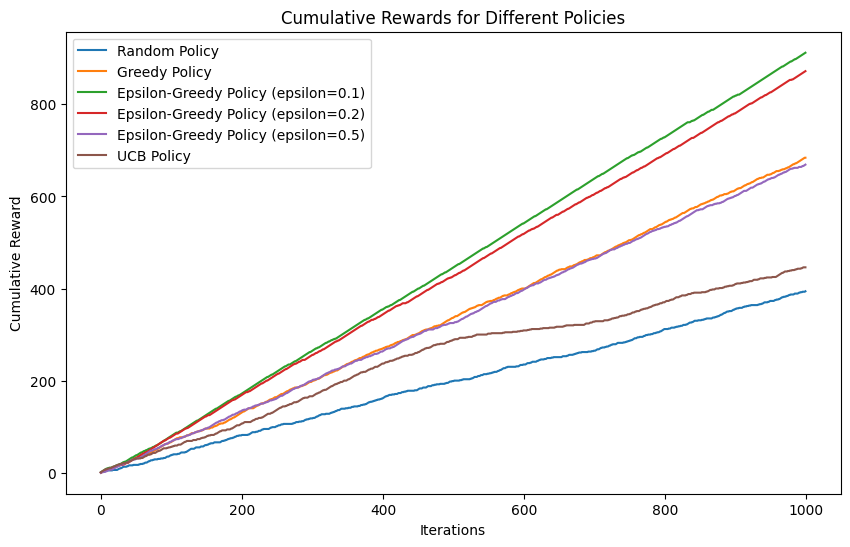

In [10]:
# Step 7: Plot cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards_random, label="Random Policy")
plt.plot(cumulative_rewards_greedy, label="Greedy Policy")

for epsilon, rewards in cumulative_rewards_epsilon.items():
    plt.plot(rewards, label=f"Epsilon-Greedy Policy (epsilon={epsilon})")

plt.plot(cumulative_rewards_ucb, label="UCB Policy")
plt.xlabel("Iterations")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Rewards for Different Policies")
plt.legend()
plt.show()

8. Determine which policy performs the best based on cumulative reward. Provide a concise conclusion summarizing the decision-making process and the trade-offs between exploration and exploitation.

In [11]:
# Step 8: Conclusion
final_rewards = {
    "Random Policy": cumulative_rewards_random[-1],
    "Greedy Policy": cumulative_rewards_greedy[-1],
    "Epsilon-Greedy (epsilon=0.1)": cumulative_rewards_epsilon[0.1][-1],
    "Epsilon-Greedy (epsilon=0.2)": cumulative_rewards_epsilon[0.2][-1],
    "Epsilon-Greedy (epsilon=0.5)": cumulative_rewards_epsilon[0.5][-1],
    "UCB Policy": cumulative_rewards_ucb[-1],
}

best_policy = max(final_rewards, key=final_rewards.get)

conclusion = f"""
Based on cumulative rewards, the best-performing policy is '{best_policy}' with a reward of {final_rewards[best_policy]:.2f}.
Here is the performance breakdown:
{final_rewards}
"""

print("\nConclusion:")
print(conclusion)


Conclusion:

Based on cumulative rewards, the best-performing policy is 'Epsilon-Greedy (epsilon=0.1)' with a reward of 912.00.
Here is the performance breakdown:
{'Random Policy': np.int64(394), 'Greedy Policy': np.int64(684), 'Epsilon-Greedy (epsilon=0.1)': np.int64(912), 'Epsilon-Greedy (epsilon=0.2)': np.int64(872), 'Epsilon-Greedy (epsilon=0.5)': np.int64(669), 'UCB Policy': np.int64(446)}

